# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
PATH = (r'D:\Program Files\data\PetImages')

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(PATH): 
    for image in os.listdir(os.path.join(PATH, image_class)):
        image_path = os.path.join(PATH, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            # h= 0
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image D:\Program Files\data\PetImages\Cat\0.jpg
Issue with image D:\Program Files\data\PetImages\Cat\1.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10.jpg
Issue with image D:\Program Files\data\PetImages\Cat\100.jpg
Issue with image D:\Program Files\data\PetImages\Cat\1000.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10000.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10001.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10002.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10003.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10004.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10005.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10006.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10007.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10008.jpg
Issue with image D:\Program Files\data\PetImages\Cat\10009.jpg
Issue with image D:\Program Files\data\PetImages\Cat\1001.jpg
Issue w

# Loading and Formating the Data
- create a dataframe
- split into train test and validate
- format the data

In [7]:
data = tf.keras.utils.image_dataset_from_directory(PATH)

Found 25000 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

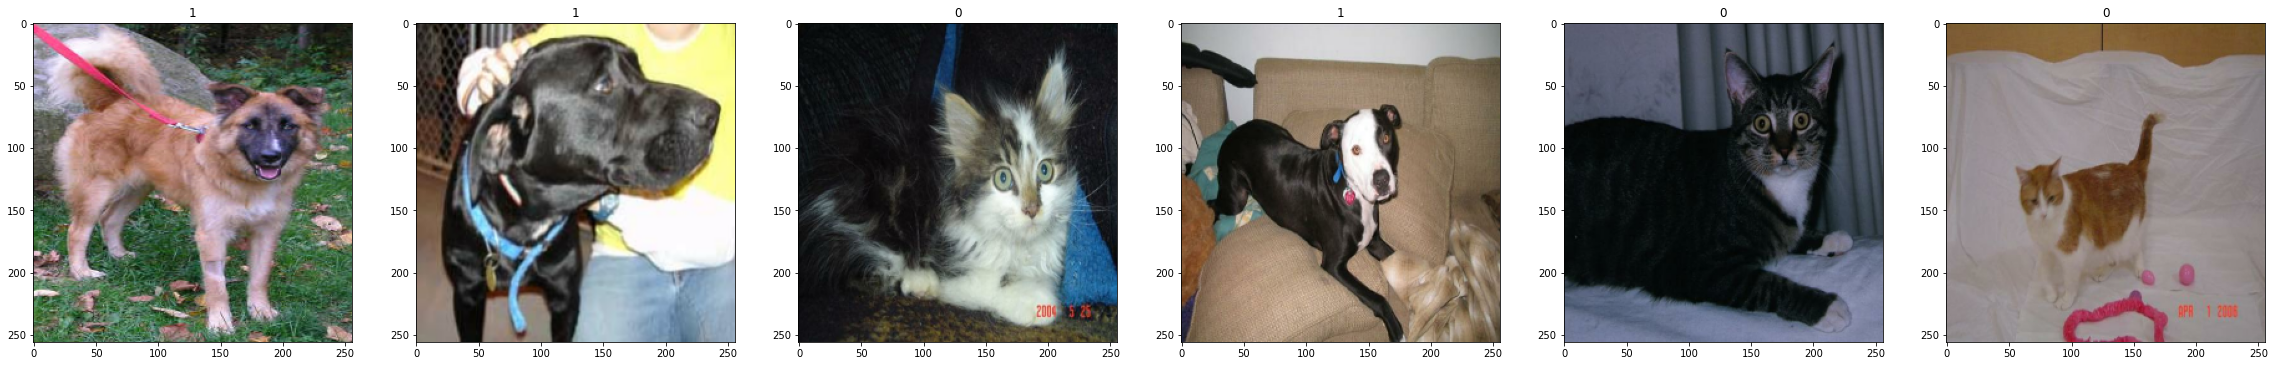

In [10]:
fig, ax = plt.subplots(ncols=6, figsize=(40,40))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# How CNN's Work
- Convolutions
- Max/Min Pooling
- Fully Connected

# Creating the Model

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 35/547 [>.............................] - ETA: 12s - loss: 0.7206 - accuracy: 0.5196

InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_7]]
  (1) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1024]

# Analyzing Performence

# What Does the CNN See?